**Project:** Customizing Data Visualizations

The dataset for this project is in recent-grads.csv

**Parts 1 & 2:** Set up the environment and load the data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

recent_grads = pd.read_csv('data/recent-grads.csv')
recent_grads_c = recent_grads.dropna()

print('SNAPSHOT OF THE DATA')
print(recent_grads_c.head(3))
print(recent_grads_c.tail(3))
print('\n')

print('SIZE OF THE DATASET')
print('The table has {0} rows and {1} columns.'.format(recent_grads_c.shape[0], recent_grads_c.shape[1]))
removed = recent_grads.shape[0] - recent_grads_c.shape[0]
print('A total of {0} rows was removed due to the presence of NaN values.'.format(removed))
print('\n')

print('SUMMARY STATISTICS')
print(recent_grads_c.describe())

SNAPSHOT OF THE DATA
   Rank  Major_code                           Major Major_category  Total  \
0     1        2419           PETROLEUM ENGINEERING    Engineering   2339   
1     2        2416  MINING AND MINERAL ENGINEERING    Engineering    756   
2     3        2415       METALLURGICAL ENGINEERING    Engineering    856   

   Sample_size   Men  Women  ShareWomen  Employed      ...        Part_time  \
0           36  2057    282    0.120564      1976      ...              270   
1            7   679     77    0.101852       640      ...              170   
2            3   725    131    0.153037       648      ...              133   

   Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th   P75th  \
0                  1207          37           0.018381  110000  95000  125000   
1                   388          85           0.117241   75000  55000   90000   
2                   340          16           0.024096   73000  50000  105000   

   College_jobs  Non_college

**Part 3:** Scatter Matrix, Part I

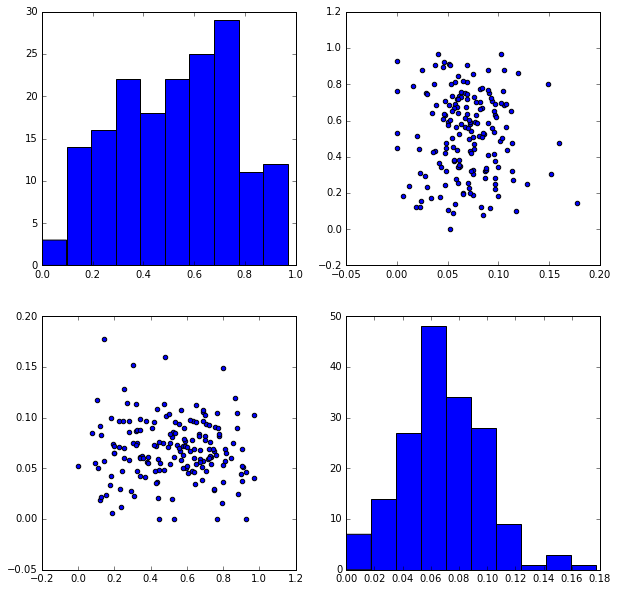

In [13]:
figure = plt.figure(figsize=(10,10))
tl = figure.add_subplot(2,2,1)
tr = figure.add_subplot(2,2,2)
bl = figure.add_subplot(2,2,3)
br = figure.add_subplot(2,2,4)

tl.hist(recent_grads_c['ShareWomen'])
tr.scatter(recent_grads_c['Unemployment_rate'], recent_grads_c['ShareWomen'])
bl.scatter(recent_grads_c['ShareWomen'], recent_grads_c['Unemployment_rate'])
br.hist(recent_grads_c['Unemployment_rate'])
plt.show()

**Part 4:** Scatter Matrix, Part 2

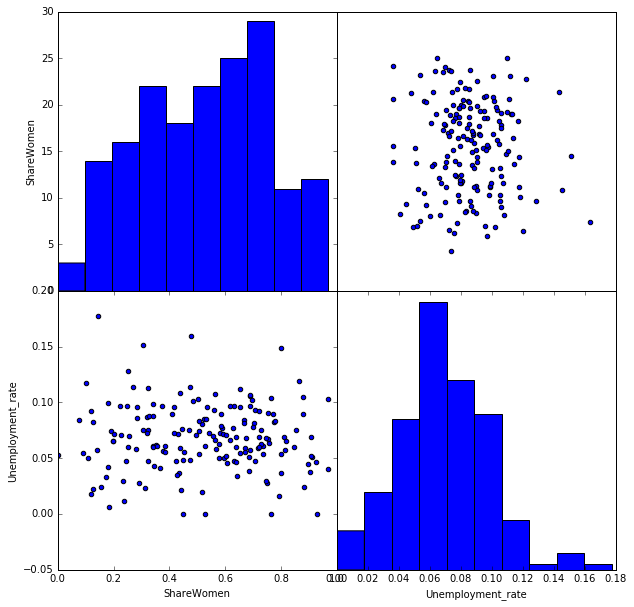

In [14]:
figure = plt.figure(figsize=(10,10))
tl = figure.add_subplot(2,2,1)
tr = figure.add_subplot(2,2,2)
bl = figure.add_subplot(2,2,3)
br = figure.add_subplot(2,2,4)

tl.hist(recent_grads_c['ShareWomen'])
tr.scatter(recent_grads_c['Unemployment_rate'], recent_grads_c['ShareWomen'])
bl.scatter(recent_grads_c['ShareWomen'], recent_grads_c['Unemployment_rate'])
br.hist(recent_grads_c['Unemployment_rate'])

tl.get_xaxis().set_visible(False)
tr.get_xaxis().set_visible(False)
tr.get_yaxis().set_visible(False)
br.get_yaxis().set_visible(False)

bl.set_xlim([0,1])

tl.set_ylabel('ShareWomen')
bl.set_xlabel('ShareWomen')
bl.set_ylabel('Unemployment_rate')
br.set_xlabel('Unemployment_rate')

figure.subplots_adjust(wspace=0, hspace=0)
plt.show()

**Part 5:** Scatter Matrix, Part 3

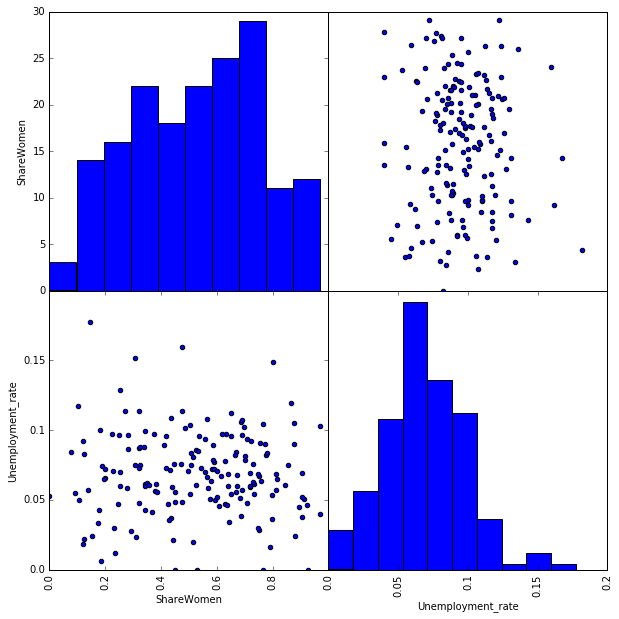

In [15]:
figure = plt.figure(figsize=(10,10))
tl = figure.add_subplot(2,2,1)
tr = figure.add_subplot(2,2,2)
bl = figure.add_subplot(2,2,3)
br = figure.add_subplot(2,2,4)

tl.hist(recent_grads_c['ShareWomen'])
tr.scatter(recent_grads_c['Unemployment_rate'], recent_grads_c['ShareWomen'])
bl.scatter(recent_grads_c['ShareWomen'], recent_grads_c['Unemployment_rate'])
br.hist(recent_grads_c['Unemployment_rate'])

tl.get_xaxis().set_visible(False)
tr.get_xaxis().set_visible(False)
tr.get_yaxis().set_visible(False)
br.get_yaxis().set_visible(False)

tl.set_ylim([0,30])
tr.set_ylim([0.0,1.0])
bl.set_xlim([0.0,1.0])
bl.set_ylim([0.0,0.20])
br.set_xlim([0.0,0.20])

tl.set_xticklabels([0, 5, 10, 15, 20, 25, 30])
bl.set_yticklabels([0.00, 0.05, 0.10, 0.15])
bl.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)
br.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)

tl.set_ylabel('ShareWomen')
bl.set_xlabel('ShareWomen')
bl.set_ylabel('Unemployment_rate')
br.set_xlabel('Unemployment_rate')

figure.subplots_adjust(wspace=0, hspace=0)
plt.show()

**Part 6:** Grouped Bar Plot, Part 1

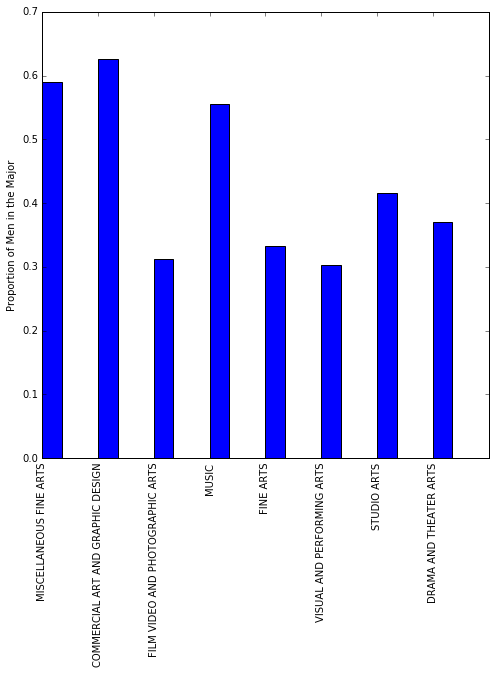

In [16]:
recent_grads_c = recent_grads_c.assign(ShareMen = 1 - recent_grads_c['ShareWomen'])

arts = recent_grads_c[recent_grads_c["Major_category"] == "Arts"]

figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot(1,1,1)

locs = np.arange(8)
bar_width = 0.35
bar_1 = ax.bar(locs, arts['ShareMen'], bar_width)

ax.set_xticklabels(arts['Major'], rotation=90)
ax.set_ylabel('Proportion of Men in the Major')
plt.show()

**Part 7:** Grouped Bar Plot, Part 2

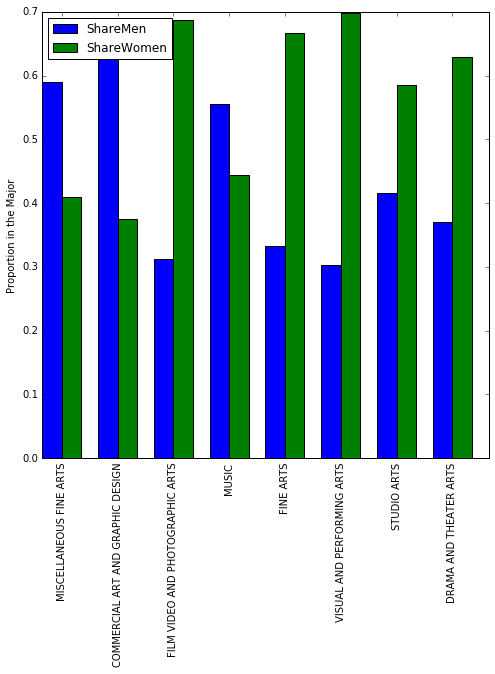

In [17]:
offset_locs = locs + bar_width

figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot(1,1,1)

locs = np.arange(8)
bar_width = 0.35
bar_1 = ax.bar(locs, arts['ShareMen'], bar_width)
bar_2 = ax.bar(offset_locs, arts['ShareWomen'], bar_width, color='green')

ax.set_xticks(offset_locs)
ax.set_xticklabels(arts['Major'], rotation=90)
ax.set_ylabel('Proportion in the Major')

plt.legend((bar_1, bar_2), ('ShareMen', 'ShareWomen'), loc='upper left')
plt.show()

**Part 8:** Next Steps

Recommended Additional Work
1. Stacked bar plot to show gender ratios for each major
2. Make histograms without .hist()
3. Make boxplot just using Matplotlib
4. Create a function that takes in a DataFrame and list of column names and generates a scatter matrix using just Matplotlib

**Additional Part 1:** Stacked bar plot to show gender ratios

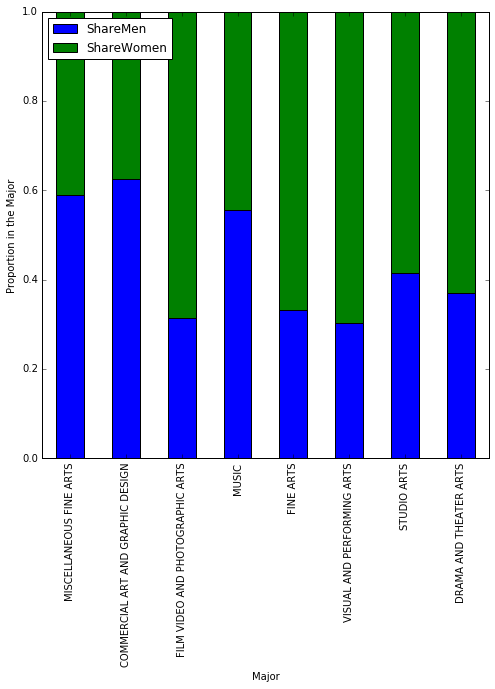

In [18]:
arts_indexed = arts.set_index('Major')

figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot(1,1,1)

locs = np.arange(8)
bar_width = 0.5
offset_locs = locs + (bar_width/2)

bar_1 = ax.bar(offset_locs, arts['ShareMen'], bar_width)
bar_2 = ax.bar(offset_locs, arts['ShareWomen'], bar_width, bottom=arts['ShareMen'], color='green')

ax.set_xticks(offset_locs+(bar_width/2))
ax.set_xticklabels(arts['Major'], rotation=90)
ax.set_xlabel('Major')
ax.set_ylabel('Proportion in the Major')

plt.legend((bar_1, bar_2), ('ShareMen', 'ShareWomen'), loc='upper left')
plt.show()

**Additional Part 2:** A histogram without .hist()

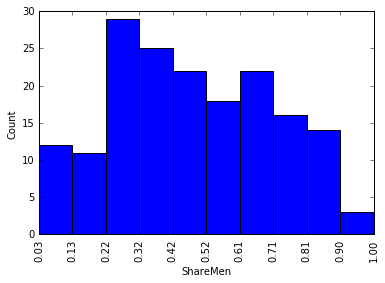

In [19]:
from matplotlib.ticker import FormatStrFormatter

# Define a function that generates the histogram plot

def hist_plot(bin_edges, results, name):
    figure = plt.figure()
    ax = figure.add_subplot(1,1,1)
    
    bar_width = bin_edges[1] - bin_edges[0]

    bar_1 = ax.bar(bin_edges[0:len(bin_edges)-1], results, bar_width)
    
    ax.set_xlim([bin_edges[0], bin_edges[len(bin_edges)-1]])
    ax.set_xticks(bin_edges)
    ax.set_xticklabels(bin_edges, rotation=90)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_xlabel(name)
    ax.set_ylabel('Count')
    plt.show()
    
# Define a function that generates the values used for the histogram

def histogram(df_series, bin_num):
    name = df_series.name
    data = list(df_series)
    min_val = np.min(data)
    max_val = np.max(data)
    step_val = (max_val - min_val) / bin_num
    bin_edges = np.arange(start=min_val, stop=(max_val+step_val), step=step_val)

    results = []
    for i in range(len(bin_edges)-1):
        if i == 0:
            count = df_series[(df_series >= bin_edges[i]) & (df_series <= bin_edges[i+1])].count()
        else:
            count = df_series[(df_series > bin_edges[i]) & (df_series <= bin_edges[i+1])].count()
        results.append(count)
    hist_plot(bin_edges, results, name)

# Call the function    
    
histogram(recent_grads_c['ShareMen'], 10)

**Additional Part 3:** Box plot with Matplotlib

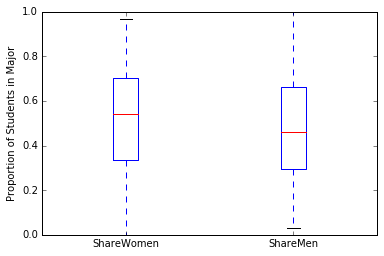

In [20]:
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
    
box_1 = ax.boxplot([list(recent_grads_c['ShareWomen']), list(recent_grads_c['ShareMen'])])

ax.set_xticklabels(['ShareWomen', 'ShareMen'])
ax.set_ylabel('Proportion of Students in Major')
plt.show()

**Additional Part 4:** Scatter matrix function using Matplotlib

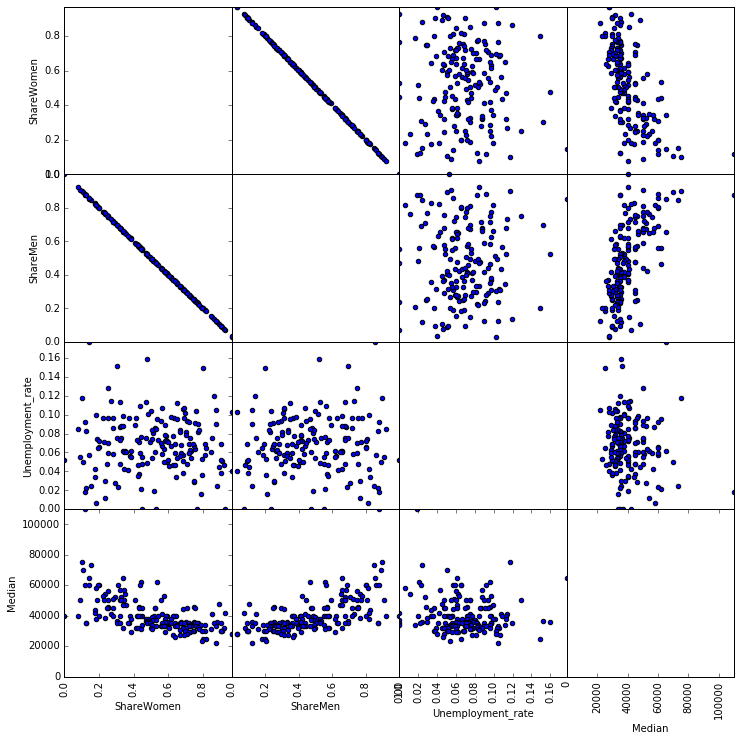

In [43]:
# This is a variation on a scatter matrix, in that it does not generate histograms for i==j plots

def create_scatter_matrix(df, columns):
    figure = plt.figure(figsize=(12,12))
    dim = len(columns)
    
    limits = {}
    for col in columns:
        min_val = 0
        max_val = df[col].max()
        limits[col] = [min_val, max_val]
    
    pos = 1
    for i in columns:
        for j in columns:
            ax = figure.add_subplot(dim,dim,pos)
            if (i != j):
                ax.scatter(df[j], df[i])
            ax.set_xlim(limits[j])
            ax.set_ylim(limits[i])
            if (pos <= (dim**2 - dim)):
                ax.get_xaxis().set_visible(False)
            else:
                plt.xticks(rotation=90)
                ax.set_xlabel(df[j].name)
            if (pos % dim != 1):
                ax.get_yaxis().set_visible(False)
            else:
                ax.set_ylabel(df[i].name)
            pos += 1
    
    figure.subplots_adjust(wspace=0, hspace=0)
    plt.show()

# Call the function to test it

create_scatter_matrix(recent_grads_c, ['ShareWomen','ShareMen','Unemployment_rate','Median'])